## Linear Regression using Tensorflow

- Polynomial
- Cost function

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

/Users/freddiekarlbom/anaconda/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
trX = np.linspace(-1, 1, 101)
trY = 3 * trX + np.random.randn(*trX.shape) * 0.4 + 0.3

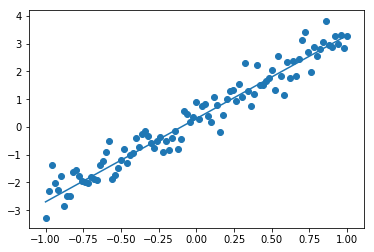

In [3]:
plt.figure()
plt.scatter(trX, trY)
plt.plot (trX, 0.3 + 3 * trX)
plt.show()

In [4]:
X = tf.placeholder("float", name="X")
Y = tf.placeholder("float", name="Y")

In [5]:
with tf.name_scope("Model"):
    def model(X, w, b):
        return tf.multiply(X, w) + b
    
    w = tf.Variable(-1.0, name="b0")
    b = tf.Variable(-3.0, name="b1")
    y_model = model(X, w, b)

In [6]:
with tf.name_scope("CostFunction"):
    cost = (tf.pow(Y-y_model, 2)) # Squared error for cost

In [7]:
learning_rate = 0.001
iterations = 50

# The meaty part
train_op = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)
sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init)

# Setup logging
log_path = './linear_regression'
tf.train.write_graph(sess.graph, log_path, 'graph.pbtxt')
cost_op = tf.summary.scalar("loss", cost)
merged = tf.summary.merge_all()
writer = tf.summary.FileWriter(log_path, sess.graph)

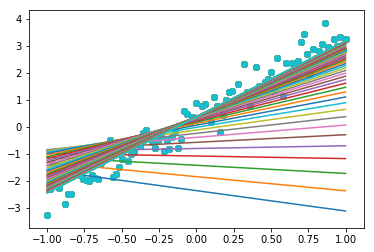

In [8]:
for i in range(iterations):
    for (x, y) in zip(trX, trY):
        sess.run(train_op, feed_dict={X: x, Y: y})
        summary_str = sess.run(cost_op, feed_dict={X: x, Y: y})
        writer.add_summary(summary_str, i)
    b0temp = b.eval(session=sess)
    b1temp = w.eval(session=sess)
    
    # Store and create animated .gif instead
    plt.plot(trX, b0temp + b1temp*trX)
    plt.scatter(trX, trY)
plt.show()

# - How plot as gif? Or save as gif so it can be imported in markdown below

In [9]:
print("Y = {w}*X + {b}".format(w=sess.run(w), b=sess.run(b)))

# - Format numbers to only have 2 decimals
# - How get this into a Latex equation for prettier output?
# 

Y = 2.818373203277588*X + 0.3632609248161316
